In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definindo os limites, tamanhos de passos e criando a matriz da pressão

In [ ]:
xf=200
yf=100
tf=0.2

nt=4000
nx=100
ny=500

hx=xf/nx
hy=yf/ny
ht=tf/nt

x=np.linspace(0,200,nx)
y=np.linspace(0,100,ny)
T=np.linspace(0,tf,nt)

U=np.zeros([nt,nx,ny])

### Condições de contorno e iniciais

In [3]:
#condições de contorno
U[:,0,:]=0
U[:,:,ny-1]=0
U[:,:,0]=0
U[:,nx-1,:]=0

#condição inicial
U[:,:,0]=0 

### Função da fonte

In [4]:
tal=lambda t: np.pi*30*(t-0.05)
f=lambda t: (1-2*tal(t)**2)*np.e**(-tal(t)**2)

iFonte=int(100/hx)
jFonte=int(5/hy)

### Definindo o C

In [5]:
c=np.zeros([nx,ny])
for j in range(ny):
    if y[j]<40:
        c[:,j]=1500
    else:
        c[:,j]=2200

Utilizando  da condição de contorno 

$u_t(x,y,0)=0$,

basta abrir a diferença finita que:

$\frac{u^1-u^{-1}}{h_t}=0 \to u^{-1}=u^1$


Substituindo na equação para o termo t+1:

$u^1=F(u_0)h_t^2+2u^0-u^{-1}$

$u^1=F(u_0)\frac{h_t^2}{2}+u^0$, como $u_0$ é zero apenas o termo da fonte fica na equação

Então $u^1=f(x,y,t)\frac{h_t^2}{2}$

Apliquei isso para o $u^1$ 

In [6]:
U[1,iFonte,jFonte]+=ht**2*f(T[0])/2

Abrindo as diferenças finitas na equação no final fica:

$u_{i,j}^t=ht^2\big[ c(y)^2\big( \frac{u_{i+1,j}^t-2u_{i,j}^t+u_{i-1,j}^t}{h_x^2}+\frac{u_{i,j+1}^t-2u_{i,j}^t+u_{i,j-1}^t}{h_y^2} \big) +f(t,x,y) \big] +2u_{i,j}^t-u_{i,j}^{t-1}$

E no final o disparo da fonte é adicionado ao ponto em que ela se encontra

In [7]:
for t in range(1,nt-1):
    U[t+1,1:-1,1:-1]=ht**2*c[1:-1,1:-1]**2*((U[t,2:,1:-1]-2*U[t,1:-1,1:-1]+U[t,:-2,1:-1])/hx**2+(U[t,1:-1,2:]-2*U[t,1:-1,1:-1]+U[t,1:-1,:-2])/hy**2)+2*U[t,1:-1,1:-1]-U[t-1,1:-1,1:-1]
    
    U[t+1,iFonte,jFonte]+=ht**2*f(T[t])

### Snapshots do campo U

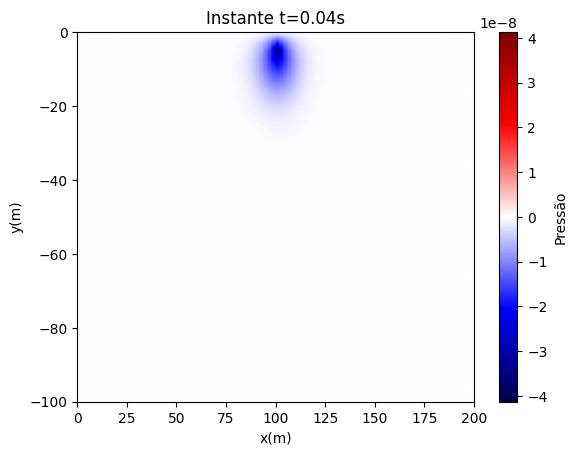

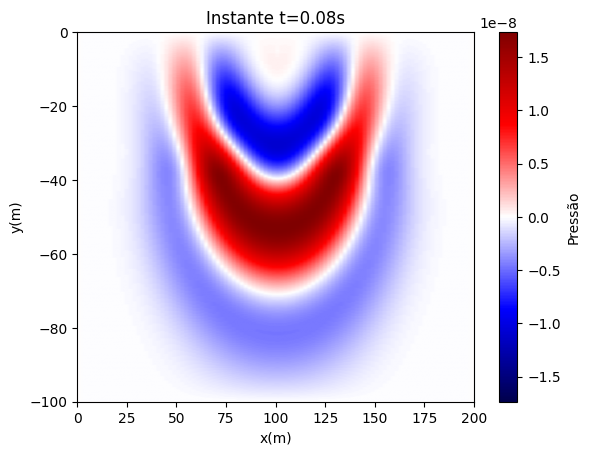

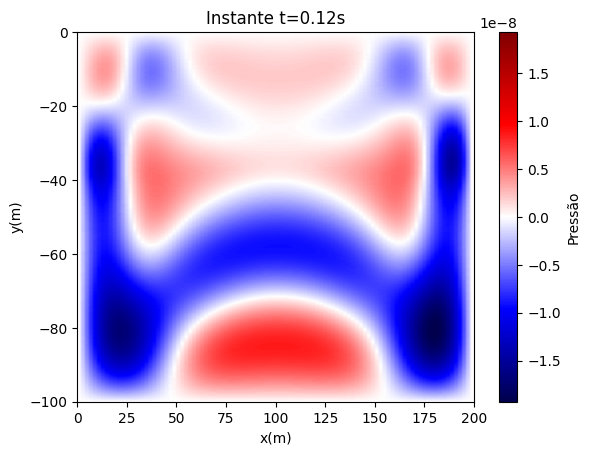

In [8]:
for n in (0.04,0.08,0.12):
    indice=int(n/ht)

    max=np.max(np.abs(U[indice,:,:].T))

    plt.imshow(U[indice,:,:].T,origin='lower',cmap='seismic',aspect='auto',extent=[0,200,0,-100],vmin=-max,vmax=max)
    plt.title(f'Instante t={n}s')
    plt.xlabel('x(m)')
    plt.ylabel('y(m)')
    plt.gca().invert_yaxis()
    plt.colorbar(label='Pressão')
    plt.show()

### Para descobrir o ponto da onda direta eu escolho o primeiro ponto com alguma pertubação significativa. Para o ponto da onda inversa  eu selecionei o intervalo onde ele acontece e escolho o ponto com mais amplitude absoluta.

In [72]:
xg=int(160/hx)
yg=int(5/hy)

for indice,valor in enumerate(U[:,xg,yg]):
    if abs(valor)>10**(-11):
        onda_direta_t=indice
        onda_direta_y=valor

        break

onda_inversa_t=np.argmin(U[int(0.140/ht):int(0.160/ht),xg,yg])+int(0.140/ht)
onda_inversa_y=np.min(U[int(0.140/ht):int(0.160/ht),xg,yg])

### Este é o gráfico do Sismograma

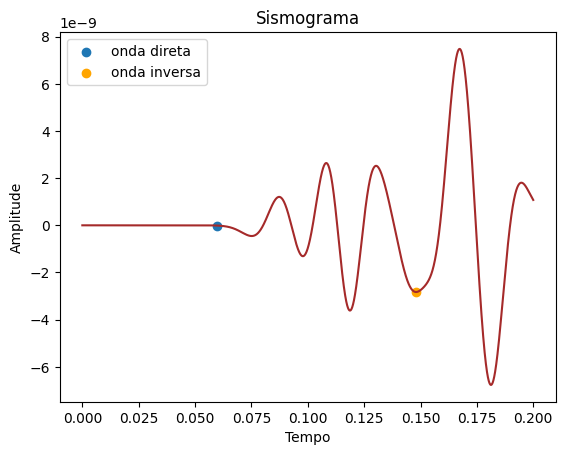

In [73]:
plt.plot(T,U[:,xg,yg],color='brown')
plt.scatter(onda_direta_t*ht,onda_direta_y,label='onda direta')
plt.scatter(arg*ht,onda_inversa_y,label='onda inversa',color='orange')
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.title('Sismograma')
plt.legend()
plt.show()